# This file was made to test different algorithms for finding Sudoku solutions. 
**The algorithms are:**
- Backtracking with heuristics:
    - Minimum Remaining Values (MRV)
    - Degree Heuristic
    - Least Constraining Value (LCV)
- Linear Programming

In [23]:
# First, we want to import the necessary libraries
import numpy as np
import pandas as pd
import time
import tracemalloc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [38]:
# Then we want to read the data from the csv file
sudokus = pd.read_csv(r"C:\Users\etien\Telecom\sudoku.csv\sudoku.csv")

# We only want to keep 500 random sudoku puzzles
sudokus = sudokus.sample(n=500)

# We just want to keep the first column (the second one is the solution)
sudokus = sudokus.iloc[:,0]

In [39]:
# We want to convert the sudokus into a numpy array
sudokus = sudokus.to_numpy()

# We now want to convert each sudoku into a 9x9 numpy array
sudokus = np.array([np.array(list(sudoku)).reshape(9,9).astype(int) for sudoku in sudokus])

# We want to print the first sudoku to check if everything is working
print(sudokus[0])

[[0 0 2 0 4 0 3 1 0]
 [1 7 0 0 6 9 0 0 0]
 [8 0 4 1 3 0 6 0 0]
 [2 3 0 0 0 0 8 0 0]
 [0 8 6 9 2 0 0 7 0]
 [4 0 7 0 0 0 0 5 2]
 [0 4 0 0 0 0 0 0 8]
 [0 0 8 7 0 0 1 4 6]
 [7 0 1 0 9 4 2 0 5]]


In [20]:
# Importation of the algorithms
from sudoku_solvers import backtracking_solver, lp_solver, mrv_heuristic, degree_heuristic, lcv_heuristic

In [21]:
# Preparation of the algorithms
solvers = [backtracking_solver, lp_solver]
heuristics = [mrv_heuristic, degree_heuristic, lcv_heuristic]

In [ ]:
# Function to measure performance
def measure_performance(solver_func, grid, heuristic=None):
    # Start tracking memory usage
    tracemalloc.start()
    
    # Record the start time
    start_time = time.time()
    
    # Solve the Sudoku puzzle
    if heuristic:
        solution_count = solver_func(grid.copy(), heuristic=heuristic)
    else:
        solution_count = solver_func(grid.copy())
    
    # Calculate elapsed time
    elapsed_time = time.time() - start_time
    
    # Get memory usage
    current, peak = tracemalloc.get_traced_memory()
    
    # Stop tracking memory usage
    tracemalloc.stop()
    
    return elapsed_time, peak / 1024  # Time in seconds, memory in KB

# Function to plot histograms
def plot_histogram(results, ylabel, title):
    labels = list(results.keys())
    values = [np.mean(results[label]) for label in labels]
    
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

Running Tests: 100%|██████████████████████████████████████████████| 500/500 [23:35<00:00,  2.83s/it]

Average Time per Algorithm:
Backtracking: 0.5571 seconds
Backtracking with degree_heuristic: 0.6477 seconds
Backtracking with mrv_heuristic: 0.3117 seconds
Backtracking with lcv_heuristic: 1.1129 seconds
LP Solver: 0.1996 seconds

Average Memory Usage per Algorithm:
Backtracking: 5338.11 KB
Backtracking with degree_heuristic: 15.44 KB
Backtracking with mrv_heuristic: 16.73 KB
Backtracking with lcv_heuristic: 21.04 KB
LP Solver: 2266.89 KB


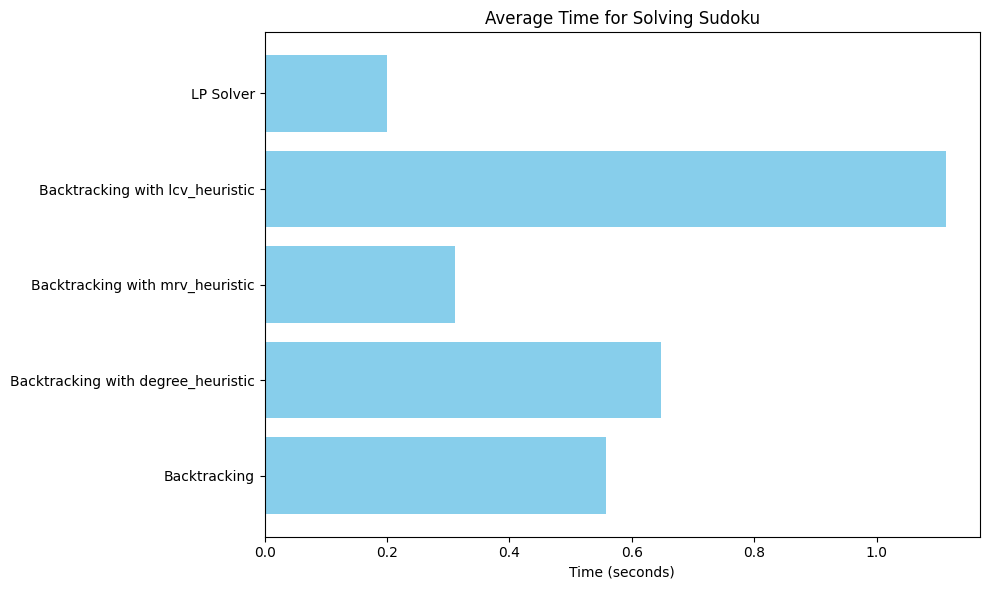

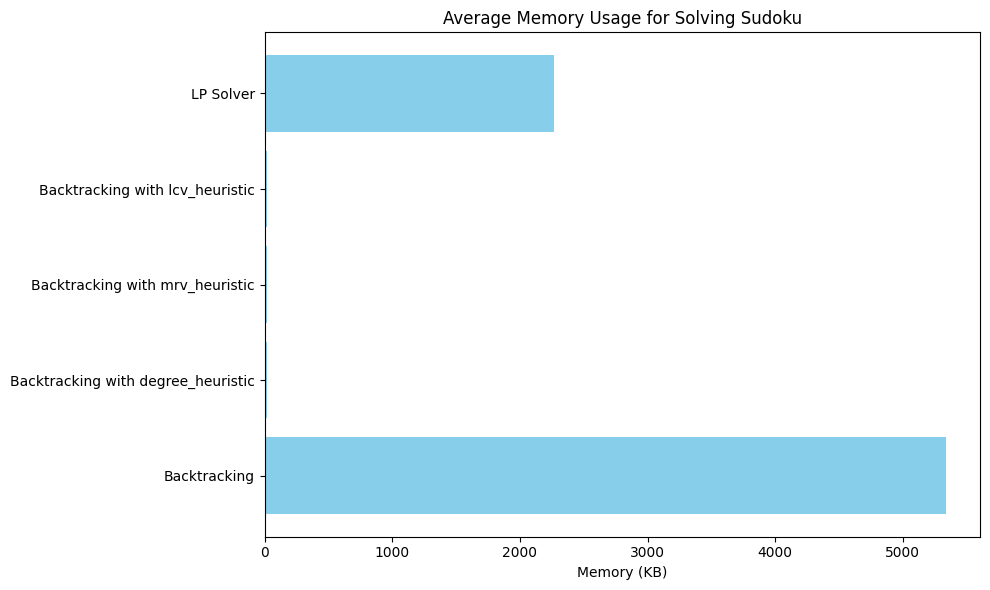

In [40]:
# Initialisation des listes pour stocker les résultats
time_results = {"Backtracking": [], "Backtracking with degree_heuristic": [],
                "Backtracking with mrv_heuristic": [], "Backtracking with lcv_heuristic": [], "LP Solver": []}
memory_results = {"Backtracking": [], "Backtracking with degree_heuristic": [],
                "Backtracking with mrv_heuristic": [], "Backtracking with lcv_heuristic": [], "LP Solver": []}

# Test de chaque algorithme sur 100 grilles
for i, grid in tqdm(enumerate(sudokus), total=len(sudokus), desc="Running Tests", ncols=100):

    # Tester Backtracking sans heuristique
    time_taken, memory_used = measure_performance(backtracking_solver, grid)
    time_results["Backtracking"].append(time_taken)
    memory_results["Backtracking"].append(memory_used)

    # Tester Backtracking avec différentes heuristiques
    for heuristic in heuristics:
        heuristic_name = heuristic.__name__
        time_taken, memory_used = measure_performance(backtracking_solver, grid, heuristic)
        time_results[f"Backtracking with {heuristic_name}"].append(time_taken)
        memory_results[f"Backtracking with {heuristic_name}"].append(memory_used)

    # Tester LP Solver
    time_taken, memory_used = measure_performance(lp_solver, grid)
    time_results["LP Solver"].append(time_taken)
    memory_results["LP Solver"].append(memory_used)

# Affichage des résultats
print("Average Time per Algorithm:")
for label in time_results:
    avg_time = np.mean(time_results[label])
    print(f"{label}: {avg_time:.4f} seconds")
    
print("\nAverage Memory Usage per Algorithm:")
for label in memory_results:
    avg_memory = np.mean(memory_results[label])
    print(f"{label}: {avg_memory:.2f} KB")

# Tracer l'histogramme
plot_histogram(time_results, 'Time (seconds)', 'Average Time for Solving Sudoku')
plot_histogram(memory_results, 'Memory (KB)', 'Average Memory Usage for Solving Sudoku')

After testing the algorithms, we'll choose the **LP Solver** algorithm to solve the Sudoku problem.